In [28]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import numpy as np
df = pd.read_excel('.\DataBase.xlsx')

In [2]:
df.keys()

Index(['Circuito', 'Año', '#_Carrera', '#_Race_Driver', 'Piloto',
       'Nacionalidad', 'Escudería', 'Podio_Y', 'Driver_Points_x1', 'Grid_x2',
       'Escudedría_points_x3', 'NF_x5'],
      dtype='object')

In [3]:
df[['Podio_Y','Driver_Points_x1','Grid_x2','Escudedría_points_x3','NF_x5']].corr()

,Podio_Y,Driver_Points_x1,Grid_x2,Escudedría_points_x3,NF_x5
Podio_Y,1.000000,0.834580,-0.491566,0.731179,-0.010850
Driver_Points_x1,0.834580,1.000000,-0.635107,0.869937,-0.017800
Grid_x2,-0.491566,-0.635107,1.000000,-0.676256,0.024037
Escudedría_points_x3,0.731179,0.869937,-0.676256,1.000000,-0.012094
NF_x5,-0.010850,-0.017800,0.024037,-0.012094,1.000000


In [4]:
df.head()

,Circuito,Año,#_Carrera,#_Race_Driver,Piloto,Nacionalidad,Escudería,Podio_Y,Driver_Points_x1,Grid_x2,Escudedría_points_x3,NF_x5
0,Bahrain Grand Prix,2010,1,1,Adrian Sutil,German,Force India,0,0,10,2.0,0
1,Australian Grand Prix,2010,2,2,Adrian Sutil,German,Force India,0,0,10,6.0,1
2,Malaysian Grand Prix,2010,3,3,Adrian Sutil,German,Force India,0,10,4,10.0,0
3,Chinese Grand Prix,2010,4,4,Adrian Sutil,German,Force India,0,0,10,0.0,0
4,Spanish Grand Prix,2010,5,5,Adrian Sutil,German,Force India,0,6,11,6.0,0


In [5]:
df["Piloto"].unique()

array(['Adrian Sutil', 'Alexander Albon', 'Alexander Rossi',
       'André Lotterer', 'Antonio Giovinazzi', 'Brendon Hartley',
       'Bruno Senna', 'Carlos Sainz', 'Charles Leclerc', 'Charles Pic',
       'Christian Klien', 'Daniel Ricciardo', 'Daniil Kvyat',
       'Esteban Gutiérrez', 'Esteban Ocon', 'Felipe Massa', 'Felipe Nasr',
       'Fernando Alonso', 'George Russell', 'Giedo van der Garde',
       'Heikki Kovalainen', "Jérôme d'Ambrosio", 'Jaime Alguersuari',
       'Jarno Trulli', 'Jean-Éric Vergne', 'Jenson Button',
       'Jolyon Palmer', 'Jules Bianchi', 'Kamui Kobayashi',
       'Karun Chandhok', 'Kevin Magnussen', 'Kimi Räikkönen',
       'Lance Stroll', 'Lando Norris', 'Lewis Hamilton',
       'Lucas di Grassi', 'Marcus Ericsson', 'Mark Webber', 'Max Chilton',
       'Max Verstappen', 'Michael Schumacher', 'Narain Karthikeyan',
       'Nick Heidfeld', 'Nico Hülkenberg', 'Nico Rosberg',
       'Pascal Wehrlein', 'Pastor Maldonado', 'Paul di Resta',
       'Pedro de la Ro

In [9]:
piloto = input('Dime un piloto: ')
df_piloto = df.loc[df['Piloto'] == piloto]
Y = df_piloto['Podio_Y']
X = df_piloto[['Driver_Points_x1', 'Grid_x2', 'Escudedría_points_x3', 'NF_x5' ]]
model = sm.Logit(Y, X).fit()
print(model.summary())

Dime un piloto: Sebastian Vettel
Optimization terminated successfully.
         Current function value: 0.351672
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Podio_Y   No. Observations:                  198
Model:                          Logit   Df Residuals:                      194
Method:                           MLE   Df Model:                            3
Date:                Tue, 19 May 2020   Pseudo R-squ.:                  0.4872
Time:                        17:46:48   Log-Likelihood:                -69.631
converged:                       True   LL-Null:                       -135.79
Covariance Type:            nonrobust   LLR p-value:                 1.721e-28
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Driver_Points_x1         0.3654      0.059      6.244  

In [12]:
piloto = input('Dime un piloto: ')
df_piloto = df.loc[df['Piloto'] == piloto]
Y = df_piloto['Podio_Y']
X = df_piloto[['Driver_Points_x1', 'Grid_x2', 'Escudedría_points_x3' ]]
model = sm.Logit(Y, X).fit()

Dime un piloto: Sebastian Vettel
Optimization terminated successfully.
         Current function value: 0.355058
         Iterations 7


In [14]:
Y_hat_ps = model.predict(X)
print(Y_hat_ps)

3546    0.884298
3547    0.367089
3548    0.939555
3549    0.748321
3550    0.446724
          ...   
3739    0.949900
3740    0.882562
3741    0.096955
3742    0.358505
3743    0.330278
Length: 198, dtype: float64


In [30]:
suma_correct = 0
suma_y_1 = 0
threshold = df_piloto['Podio_Y'].sum() / 198
for i in range(300):
    true_y = df_piloto['Podio_Y']
    y_hat_p = Y_hat_ps
    if y_hat_p >= threshold:
        y_hat = 1
    else:
        y_hat = 0
    if true_y == y_hat:
        suma_correct += 1
    suma_y_1 += y_hat
print('Fitness:', suma_correct / 198 )
print(df_piloto['Podio_Y'].sum())
print(suma_y_1)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [33]:
success_rates = []
for threshold in np.linspace(0, 1, 100):
    suma_correct = 0
    suma_y_1 = 0
    for i in range(198):
        true_y = df_piloto['Podio_Y']
        y_hat_p = Y_hat_ps[i]
        if y_hat_p >= threshold:
            y_hat = 1
        else:
            y_hat = 0
        if true_y == y_hat:
            suma_correct += 1
        suma_y_1 += y_hat
    success_rate = suma_y_1 / 198
    success_rates.append(success_rate)

KeyError: 0

ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

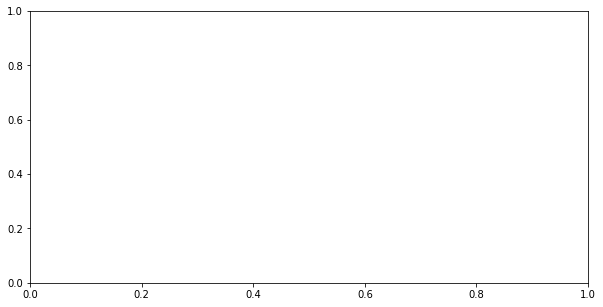

In [34]:
fig = plt.figure(figsize=(10, 5))
axis = plt.gca()
plt.plot(list(np.linspace(0, 1, 100)), success_rates)
plt.axhline(distritos['y_{}'.format(partido)].sum() / 300, color='red', linewidth=1)
plt.xlim(0, 1)
fig.tight_layout()
plt.show()
plt.close(plt.gcf())
print('\nDone!')
winsound.Beep(frequency, duration)